In [6]:
#Dando import nas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
low_memory = False

In [7]:
# declaraçãos das variáveis
inscritos = [] 
auditivo = []
fisico = []
d = '/home/joaomedeiros/MicrodadosINEP/Dados/MICRODADOS_ENEM_' 
anos = ['2012', '2013', '2014', '2015', '2016', '2017', '2018'] 
e = '.csv'

In [8]:
# 2012 é ; 2013 é ; 2014 é , 2015 é , 2016 é , 2017 é ; 2018 é ;
#criação do Data Frame e Leitura dos arquivos, contando os dados e armazená-los nas respectivas listas
#Compararemos o aumento das inscrições normais x inscrições especiais (deficiencia fisica e auditiva )
for ano in anos:
    if ano == '2014' or ano == '2015' or ano == '2016':
        df = pd.read_csv(d+ano+e, usecols=['NU_INSCRICAO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA'], delimiter = ',', encoding = 'iso-8859-1')    
    else:
        df = pd.read_csv(d+ano+e, usecols=['NU_INSCRICAO', 'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA'], delimiter = ';', encoding = 'iso-8859-1')
    auditivo.append(df.query('(IN_DEFICIENCIA_AUDITIVA == 1)')['NU_INSCRICAO'].count())
    fisico.append(df.query('(IN_DEFICIENCIA_FISICA == 1)')['NU_INSCRICAO'].count())
    inscritos.append(len(df['NU_INSCRICAO']))

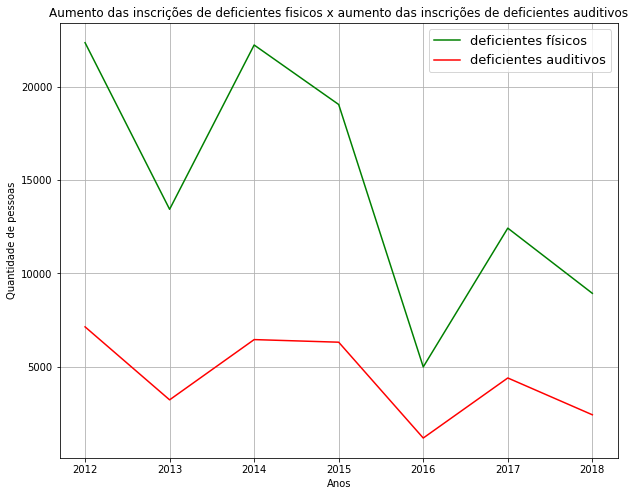

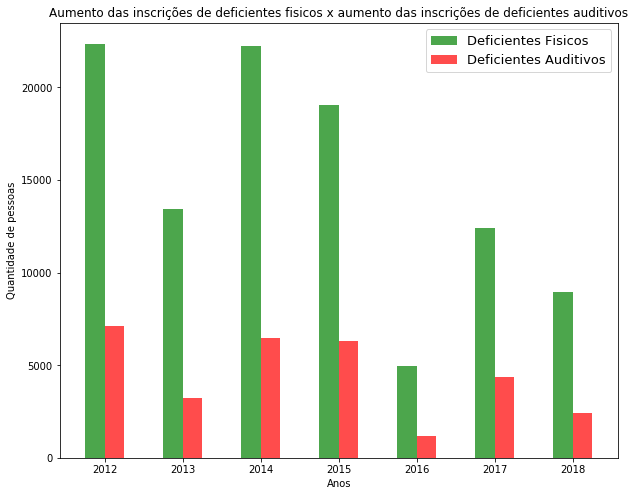

In [17]:
# Definindo o tamanho das figuras
plt.rcParams['figure.figsize'] = (10,8)
# Plotando os gráficos
plt.figure(1)
plt.plot(anos, fisico, color='green', label='deficientes físicos')
plt.plot(anos, auditivo, color='red', label='deficientes auditivos')
plt.title('Aumento das inscrições de deficientes fisicos x aumento das inscrições de deficientes auditivos')
plt.xlabel('Anos')
plt.ylabel('Quantidade de pessoas')
plt.legend(prop={'size':13})
plt.grid(True)
plt.show()
plt.figure(2)
barWidth = 0.25
r1 = np.arange(len(anos))
plt.bar(r1, fisico, barWidth, alpha=0.7, color='green', label='Deficientes Fisicos')
plt.bar(r1 + barWidth, auditivo, barWidth, alpha=0.7, color='red', label='Deficientes Auditivos')
plt.xlabel('Anos')
plt.xticks([r + 0.125 for r in range(len(inscritos))], ['2012', '2013', '2014', '2015', '2016', '2017', '2018'])
plt.ylabel('Quantidade de pessoas')
plt.title('Aumento das inscrições de deficientes fisicos x aumento das inscrições de deficientes auditivos')
plt.legend(prop={'size':13})
plt.show()

In [45]:
# Tabela para visualização dos dados
porcent_inscritos = []
porcent_fisico = []
porcent_auditivo = []
for i in range(len(anos)):
    porcent_fisico.append(round((fisico[i]/inscritos[i])*100, 2))
    porcent_auditivo.append(round((auditivo[i]/inscritos[i])*100, 2))
    porcent_inscritos.append(round((1-(auditivo[i]+fisico[i])/inscritos[i])*100, 2))
    #porcent_inscritos.append(round(((inscritos[i]/(fisico[i]+auditivo[i]))*100, 2))
    
tabela = {}

for i in range(len(anos)):    
    tabela.update({anos[i]: [inscritos[i], fisico[i], auditivo[i], porcent_fisico[i], porcent_auditivo[i], porcent_inscritos[i]]})
df_tabela = pd.DataFrame(tabela, columns=anos, index=['Inscritos','Deficientes Fisicos', 'Deficientes Auditivos', 'Deficientes Fisicos (%)', 'Deficientes Auditivos (%)', 'Inscrições normais (%)'])
df_tabela

,2012,2013,2014,2015,2016,2017,2018
Inscritos,8627367.00,7173563.00,8722248.00,7746427.00,5791065.00,6731341.00,5513747.00
Deficientes Fisicos,22369.00,13435.00,22245.00,19054.00,4982.00,12424.00,8929.00
Deficientes Auditivos,7131.00,3217.00,6448.00,6308.00,1169.00,4390.00,2416.00
Deficientes Fisicos (%),0.26,0.19,0.26,0.25,0.09,0.18,0.16
Deficientes Auditivos (%),0.08,0.04,0.07,0.08,0.02,0.07,0.04
Inscrições normais (%),99.66,99.77,99.67,99.67,99.89,99.75,99.79


In [42]:
print(porcent_inscritos)

[99.66, 99.77, 99.67, 99.67, 99.89, 99.75, 99.79]
